In [2]:
import pandas as pd
data = pd.read_csv("Hamspam.csv",encoding = "ISO-8859-1")

In [3]:
data.head()

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or å£10,000..."
4,spam,okmail: Dear Dave this is your final notice to...


In [4]:
data.isnull().sum()

type    0
text    0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5559 entries, 0 to 5558
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    5559 non-null   object
 1   text    5559 non-null   object
dtypes: object(2)
memory usage: 87.0+ KB


# Data Cleaning

In [56]:
import re #regular expression
import string

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_text(x)


In [57]:
data['text'] = data.text.apply(clean)
data.text

0        hope you are having a good week just checking in
1                                    kgive back my thanks
2               am also doing in cbe only but have to pay
3       complimentary  star ibiza holiday or å£ cash n...
4       okmail dear dave this is your final notice to ...
                              ...                        
5554    you are a great role model you are giving so m...
5555    awesome i remember the last time we got somebo...
5556    if you dont your prize will go to another cust...
5557    sms ac jsco energy is high but u may not know ...
5558                      shall call now dear having food
Name: text, Length: 5559, dtype: object

In [58]:
#Word frequency
freq = pd.Series(' '.join(data['text']).split()).value_counts()[:20] # for top 20
freq

to      2243
i       2228
you     2118
a       1437
the     1323
u       1298
and      965
is       892
in       886
me       789
my       753
for      709
your     659
of       619
it       616
call     577
have     575
on       534
that     509
are      490
dtype: int64

In [59]:
#removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['text'] = data['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chira\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [60]:
#word frequency after removal of stopwords
freq_Sw = pd.Series(' '.join(data['text']).split()).value_counts()[:20] # for top 20
freq_Sw

u       1298
call     577
im       462
ur       389
get      384
å£       293
dont     287
go       282
ok       278
free     275
know     257
like     244
ill      239
got      239
good     236
come     228
time     214
day      203
love     197
send     191
dtype: int64

In [9]:
# count vectoriser tells the frequency of a word.
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
vectorizer = CountVectorizer(min_df = 1, max_df = 5)
X = vectorizer.fit_transform(data["text"])
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])
#print(word_freq_df.sort('occurrences',ascending = False).head())

In [10]:
word_freq_df.head(30)

,term,occurrences,frequency
0,000pes,1,0.000082
1,008704050406,2,0.000163
2,0089,1,0.000082
3,0121,1,0.000082
4,01223585236,1,0.000082
5,01223585334,2,0.000163
6,0125698789,1,0.000082
7,0207,3,0.000245
8,02072069400,1,0.000082
9,02073162414,2,0.000163


In [11]:
#TFIDF - Term frequency inverse Document Frequencyt
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True) #keep top 1000 words
doc_vec = vectorizer.fit_transform(data["text"])
names_features = vectorizer.get_feature_names()
dense = doc_vec.todense()
print(dense)
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns = names_features)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [12]:
df

,00,000,03,04,0800,08000839402,08000930705,10,100,1000,...,yes,yesterday,yo,yr,yup,ââ,ââèït,ûªs,ûªt,ûï
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.318582,0.0,0.0,0.0,0.0,0.0,0.301802,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5554,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5555,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5556,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5557,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# N-gram

In [13]:
#Bi-gram
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    print(vec1)
    bag_of_words = vec1.transform(corpus)
    print(bag_of_words)
    sum_words = bag_of_words.sum(axis=0)
    print(sum_words)
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    print(words_freq)
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [14]:
top2_words = get_top_n2_words(data["text"], n=20) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head(50)

CountVectorizer(max_features=2000, ngram_range=(2, 2))
  (0, 147)	1
  (0, 625)	1
  (0, 668)	1
  (0, 815)	1
  (0, 1766)	1
  (0, 1879)	1
  (2, 242)	1
  (2, 621)	1
  (2, 1607)	1
  (3, 1)	1
  (3, 10)	1
  (3, 515)	1
  (3, 661)	1
  (3, 1084)	1
  (3, 1177)	1
  (4, 46)	1
  (4, 187)	1
  (4, 347)	1
  (4, 515)	1
  (4, 661)	1
  (4, 775)	1
  (4, 1179)	1
  (4, 1418)	1
  (4, 1530)	1
  (4, 1572)	1
  :	:
  (5554, 241)	1
  (5554, 415)	1
  (5554, 585)	1
  (5554, 612)	1
  (5554, 1363)	1
  (5554, 1634)	1
  (5554, 1682)	1
  (5554, 1879)	2
  (5555, 482)	1
  (5555, 499)	1
  (5555, 1464)	1
  (5555, 1467)	1
  (5555, 1547)	1
  (5556, 198)	1
  (5556, 270)	1
  (5556, 558)	1
  (5556, 698)	1
  (5556, 1238)	1
  (5556, 1831)	1
  (5556, 1899)	1
  (5556, 1991)	1
  (5557, 833)	1
  (5557, 924)	1
  (5557, 1347)	1
  (5558, 278)	1
[[7 9 9 ... 6 8 9]]
[('hope you', 45), ('you are', 130), ('are having', 11), ('having good', 5), ('week just', 15), ('just checking', 6), ('but have', 9), ('have to', 71), ('to pay', 15), ('holiday

,Bi-gram,Freq
0,are you,180
1,you are,130
2,you have,118
3,do you,108
4,if you,105
5,in the,98
6,want to,84
7,to be,83
8,will be,81
9,going to,76


[Text(0, 0, 'please call'),
 Text(1, 0, 'call later'),
 Text(2, 0, 'ill call'),
 Text(3, 0, 'let know'),
 Text(4, 0, 'sorry ill'),
 Text(5, 0, 'dont know'),
 Text(6, 0, 'good morning'),
 Text(7, 0, 'po box'),
 Text(8, 0, 'call landline'),
 Text(9, 0, 'take care'),
 Text(10, 0, 'im going'),
 Text(11, 0, 'guaranteed call'),
 Text(12, 0, 'new year'),
 Text(13, 0, 'prize guaranteed'),
 Text(14, 0, 'ok lor'),
 Text(15, 0, 'pls send'),
 Text(16, 0, 'every week'),
 Text(17, 0, 'send stop'),
 Text(18, 0, 'good night'),
 Text(19, 0, 'im gonna')]

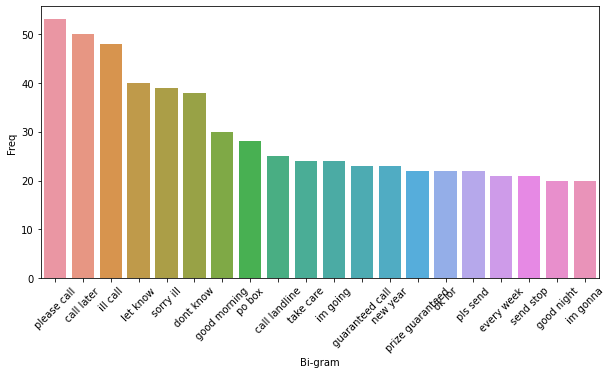

In [63]:
#Bi-gram plot
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_bigram["Bi-gram"])

In [64]:
#Tri-gram
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]


In [32]:
top3_words = get_top_n3_words(data["text"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]

In [65]:
top3_df

,Tri-gram,Freq
0,ill call later,42
1,sorry ill call,38
2,prize guaranteed call,21
3,call land line,18
4,happy new year,18
...,...,...
195,said mind go,5
196,mind go bedroom,5
197,go bedroom minute,5
198,bedroom minute ok,5


[Text(0, 0, 'ill call later'),
 Text(1, 0, 'sorry ill call'),
 Text(2, 0, 'prize guaranteed call'),
 Text(3, 0, 'call land line'),
 Text(4, 0, 'happy new year'),
 Text(5, 0, 'private account statement'),
 Text(6, 0, 'guaranteed call land'),
 Text(7, 0, 'call identifier code'),
 Text(8, 0, 'land line claim'),
 Text(9, 0, 'draw shows prize'),
 Text(10, 0, 'shows prize guaranteed'),
 Text(11, 0, 'identifier code expires'),
 Text(12, 0, 'pls send message'),
 Text(13, 0, 'account statement shows'),
 Text(14, 0, 'statement shows unredeemed'),
 Text(15, 0, 'camcorder reply call'),
 Text(16, 0, 'cant pick phone'),
 Text(17, 0, 'pick phone right'),
 Text(18, 0, 'phone right pls'),
 Text(19, 0, 'right pls send')]

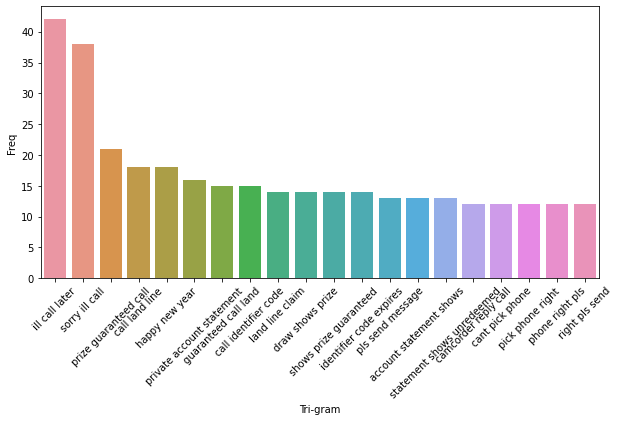

In [66]:
#Tri-gram plot
import seaborn as sns
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_trigram["Tri-gram"])

# WordCloud

In [94]:
data.text

0                                 hope good week checking
1                                       kgive back thanks
2                                            also cbe pay
3       complimentary star ibiza holiday å£ cash needs...
4       okmail dear dave final notice collect tenerife...
                              ...                        
5554    great role model giving much really wish day m...
5555    awesome remember last time got somebody high f...
5556    dont prize go another customer tc wwwtcbiz pol...
5557    sms ac jsco energy high u may know ur leadersh...
5558                                 shall call dear food
Name: text, Length: 5559, dtype: object

In [96]:
string_Total = " ".join(data["text"])

In [97]:
string_Total

'hope good week checking 1 kgive back thanks 1 also cbe pay 1 complimentary star ibiza holiday å£ cash needs urgent collection landline lose 1 okmail dear dave final notice collect tenerife holiday cash award call landline tcs sae 1 aiya discuss later lar pick u 1 much buzy 1 please ask mummy call father 1 marvel mobile play official ultimate spiderman game å£ ur mobile right text spider game send u free wallpaper 1 fyi im usf swing room whenever 1 sure thing big man hockey elections shouldn\x89ââèït go longer hour though 1 anything lor 1 march ending ready call sure problem capital never complete far hows work ladies 1 hmm well night night 1 k ill sure get noon see whats 1 ha ha cool cool chikku chikkudb 1 darren saying dat u meeting da ge den dun meet dinner cos later u leave xy feel awkward den u meet lunch lor 1 dint tell anything angry told abi 1 u u wan come come lor din c stripes skirt 1 u win å£ music gift vouchers every week starting txt word draw tscs wwwldewcom 1 coming gym 

In [70]:
!pip install wordcloud

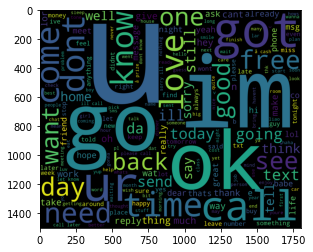

In [71]:
#wordcloud for entire corpus
from wordcloud import WordCloud
wordcloud_stw = WordCloud(
                background_color= 'black',
                width = 1800,
                height = 1500
                ).generate(string_Total)
plt.imshow(wordcloud_stw)

# Applying naive bayes for classification

In [23]:
data.head()

,type,text
0,ham,hope good week checking
1,ham,kgive back thanks
2,ham,also cbe pay
3,spam,complimentary star ibiza holiday å£ cash needs...
4,spam,okmail dear dave final notice collect tenerife...


In [15]:
def split_into_words(i):
    return (i.split(" "))


In [16]:
from sklearn.model_selection import train_test_split

email_train,email_test = train_test_split(data,test_size=0.3)

In [17]:
email_test

,type,text
5218,ham,Beautiful tomorrow never comes.. When it comes...
3992,spam,No 1 POLYPHONIC tone 4 ur mob every week! Just...
54,ham,You please give us connection today itself bef...
1486,ham,What Today-sunday..sunday is holiday..so no wo...
1655,ham,Hey sexy buns! What of that day? No word from ...
...,...,...
1145,ham,No message..no responce..what happend?
79,ham,You flippin out yet?
2293,spam,Ur cash-balance is currently 500 pounds - to m...
602,ham,The sign of maturity is not when we start sayi...


In [18]:
# Preparing email texts into word count matrix format 
emails_bow = CountVectorizer(analyzer=split_into_words).fit(data.text)

# ["mailing","body","texting"]
# ["mailing","awesome","good"]

# ["mailing","body","texting","good","awesome"]



#        "mailing" "body" "texting" "good" "awesome"
#  0          1        1       1        0       0
 
#  1          1        0        0       1       1    



In [76]:
# For all messages
all_emails_matrix = emails_bow.transform(data.text)
all_emails_matrix.shape 

(5559, 8175)

In [77]:
# For training messages
train_emails_matrix = emails_bow.transform(email_train.text)
train_emails_matrix.shape # (3891,8175)
# For testing messages
test_emails_matrix = emails_bow.transform(email_test.text)

test_emails_matrix.shape # (1668,8175)


(1668, 8175)

In [78]:
####### Without TFIDF matrices ########################
# Preparing a naive bayes model on training data set 

from sklearn.naive_bayes import MultinomialNB as MB


# Multinomial Naive Bayes
classifier_mb = MB()
classifier_mb.fit(train_emails_matrix,email_train.type)
train_pred_m = classifier_mb.predict(train_emails_matrix)
accuracy_train_m = np.mean(train_pred_m==email_train.type) # 98%

test_pred_m = classifier_mb.predict(test_emails_matrix)
accuracy_test_m = np.mean(test_pred_m==email_test.type) # 96%



In [79]:
accuracy_test_m

0.9640287769784173

# Using TFIDF

In [90]:
from sklearn.feature_extraction.text import TfidfTransformer

# Learning Term weighting and normalizing on entire emails
tfidf_transformer = TfidfTransformer().fit(all_emails_matrix)

# Preparing TFIDF for train emails
train_tfidf = tfidf_transformer.transform(train_emails_matrix)

train_tfidf.shape # (3891, 6661)

# Preparing TFIDF for test emails
test_tfidf = tfidf_transformer.transform(test_emails_matrix)

test_tfidf.shape #  (1668, 6661)



(1668, 8175)

In [91]:

test_tfidf

<1668x8175 sparse matrix of type '<class 'numpy.float64'>'
	with 13915 stored elements in Compressed Sparse Row format>

In [92]:
# Preparing a naive bayes model on training data set 

from sklearn.naive_bayes import MultinomialNB as MB


# Multinomial Naive Bayes
classifier_mb = MB()
classifier_mb.fit(train_tfidf,email_train.type)
train_pred_m = classifier_mb.predict(train_tfidf)
accuracy_train_m = np.mean(train_pred_m==email_train.type) # 96%

test_pred_m = classifier_mb.predict(test_tfidf)
accuracy_test_m = np.mean(test_pred_m==email_test.type) # 96%

 


In [93]:
accuracy_test_m

0.9628297362110312